In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

Logistic regression default

c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules

Default (with enrolled)
Dropout F1 Score: 0.6973784126568695
Dropout F1 Score var: 0.00023442525513475454
Wilcoxon 0.0006533107814151377
              precision    recall  f1-score   support

     Dropout       0.76      0.68      0.72       284
    Enrolled       0.44      0.08      0.13       159
    Graduate       0.69      0.94      0.79       442

    accuracy                           0.70       885
   macro avg       0.63      0.57      0.55       885
weighted avg       0.67      0.70      0.65       885



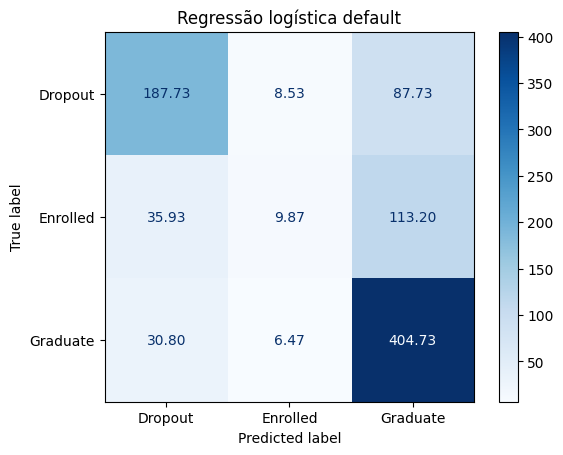

In [66]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

model = LogisticRegression()

conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

dropout_f1_score_values = []
for index in range(0,15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm
logisticRegressionMean = np.mean(dropout_f1_score_values)
print("Default (with enrolled)")
print("Dropout F1 Score:", logisticRegressionMean)
print("Dropout F1 Score var:", np.var(dropout_f1_score_values))
statistics, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon", pvalue)

print(classification_report(y_test, preds,target_names=le.classes_))

avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues",values_format='.2f')
plt.title("Regressão logística default")
plt.savefig(fname="LogisticRegressionDefault.pdf",format="pdf",dpi=400)
plt.show()

Logistic regression without enrolled

c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Willian Murayama\.conda\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules

Default (without enrolled)
Dropout F1 Score: 0.8027155653459632
Dropout F1 Score var: 0.00046976059150102676
Wilcoxon 6.103515625e-05
              precision    recall  f1-score   support

     Dropout       0.87      0.71      0.79       284
    Graduate       0.84      0.93      0.88       442

    accuracy                           0.85       726
   macro avg       0.85      0.82      0.83       726
weighted avg       0.85      0.85      0.84       726



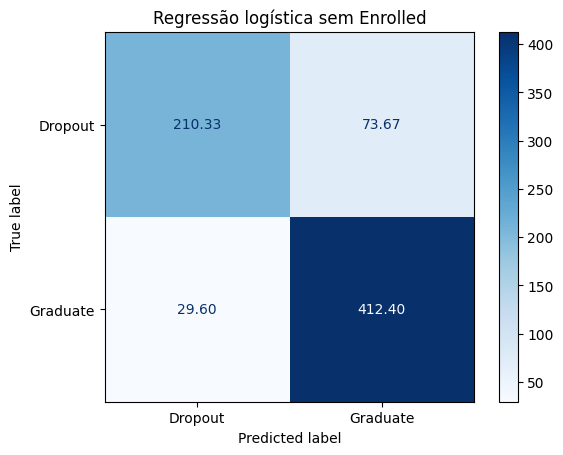

In [67]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

dropout_f1_score_values = []

model = LogisticRegression()

conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for index in range(0,15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm
logisticRegressionWithoutEnrolled = np.mean(dropout_f1_score_values)
print("Default (without enrolled)")
print("Dropout F1 Score:", logisticRegressionWithoutEnrolled)
print("Dropout F1 Score var:", np.var(dropout_f1_score_values))
statistics, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon", pvalue)

print(classification_report(y_test, preds,target_names=le.classes_))

avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues",values_format='.2f')
plt.title("Regressão logística sem Enrolled")
plt.savefig(fname="LogisticRegressionDefaultWithoutEnrolled.pdf",format="pdf",dpi=400)
plt.show()

Random forest classifier

Random forest classifier with default parameters (with enrolled)

Random forest (with enrolled)
Dropout F1 Score: 0.7987997730054925
Dropout F1 Score var: 8.972778523659943e-05
Wilcoxon 0.0006533107814151377
              precision    recall  f1-score   support

     Dropout       0.83      0.76      0.79       284
    Enrolled       0.52      0.31      0.39       159
    Graduate       0.77      0.93      0.84       442

    accuracy                           0.76       885
   macro avg       0.71      0.67      0.67       885
weighted avg       0.75      0.76      0.75       885



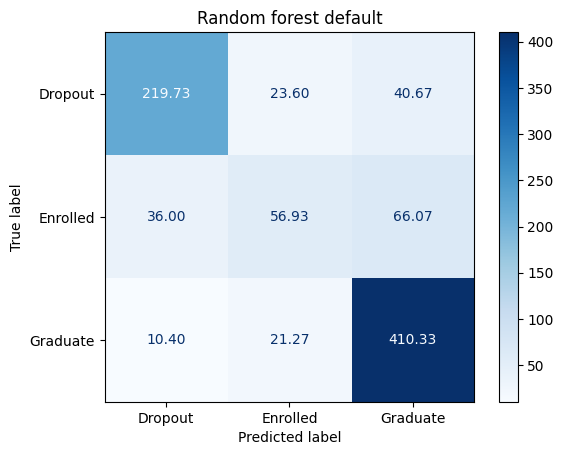

In [68]:
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

dropout_f1_score_values = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = RandomForestClassifier()

conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)
    
    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm
randomForestMean = np.mean(dropout_f1_score_values)
print("Random forest (with enrolled)")
print("Dropout F1 Score:", randomForestMean)
print("Dropout F1 Score var:", np.var(dropout_f1_score_values))
statistics, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon", pvalue)

print(classification_report(y_test, preds,target_names=le.classes_))

avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues",values_format='.2f')
plt.title("Random forest default")
plt.savefig(fname="RandomForestDefault.pdf",format="pdf",dpi=400)
plt.show()

Random forest classifier with default parameters (without enrolled)


=== Summary over 15 iterations ===
Mean Dropout F1 Score: 0.8745861571279059
Std Dev: 0.0134
Min: 0.8479, Max: 0.8930


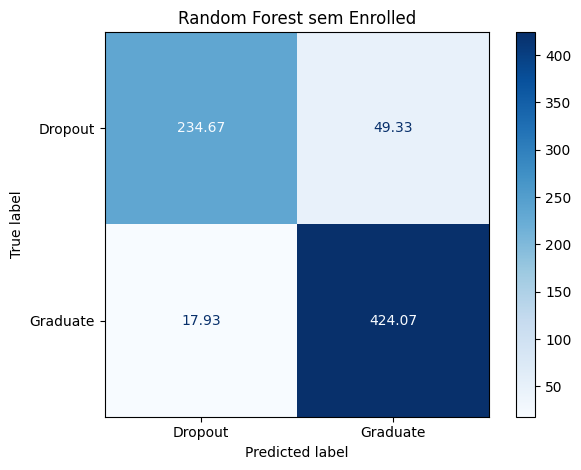

In [69]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Evaluation over 15 iterations ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

model = RandomForestClassifier()

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    # print(f"Iteration {index+1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary Statistics ===
randomForestWithoutEnrolled = np.mean(dropout_scores)
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {randomForestWithoutEnrolled}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")

# === Averaged Confusion Matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Random Forest sem Enrolled")
plt.tight_layout()
plt.savefig(fname="RandomForestDefaultWithoutEnrolled.pdf",format="pdf",dpi=400)
plt.show()

Regressão logistica teve melhoras com a remoção da classe enrolled (uma vez que essa classe não obtem métricas boas).

Porém o random forest se supera (tanto com a classe enrolled ou não), o que mais se destaca é o random forest treinado sem a classe enrolled.

Tentaremos encontrar os hiperparametros ideias com o optuna

Best trial F1 score: 0.8902874368113741
Best parameters:
  n_estimators: 283
  max_depth: 51
  min_samples_split: 8
  min_samples_leaf: 2
  max_features: log2
  bootstrap: False

Evaluation Results:
Dropout F1 Score (mean): 0.8759488810569795
Dropout F1 Score (std): 0.0052559011339806646
Dropout F1 Score (var): 2.7624496730179235e-05
Wilcoxon p-value: 0.0006533107814151377

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.93      0.83      0.88      4260
    Graduate       0.90      0.96      0.93      6630

    accuracy                           0.91     10890
   macro avg       0.91      0.89      0.90     10890
weighted avg       0.91      0.91      0.91     10890



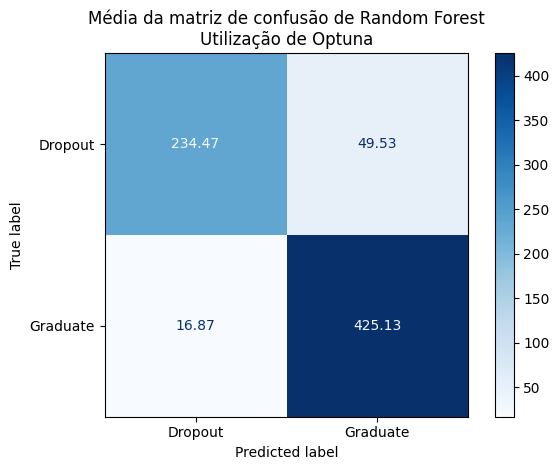

In [70]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import optuna
from scipy.stats import wilcoxon

# Load and prepare data
df = pd.read_csv('predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# Load best study
study = optuna.load_study(
    study_name="random_forest_optuna",
    storage="sqlite:///random_forest.db"
)
best_trial = study.best_trial
print(f"Best trial F1 score: {best_trial.value}")
print("Best parameters:")
for k, v in best_trial.params.items():
    print(f"  {k}: {v}")

# Evaluation settings
n_iterations = 15
dropout_f1_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))
all_preds = []
all_y_test = []

# Sequential evaluation with progress bar
for i in range(n_iterations):
    # Create train-test split with different random state each time
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y
    )
    
    # Create model with best parameters
    model = RandomForestClassifier(
        n_estimators=best_trial.params['n_estimators'],
        max_depth=best_trial.params['max_depth'],
        min_samples_split=best_trial.params['min_samples_split'],
        min_samples_leaf=best_trial.params['min_samples_leaf'],
        max_features=best_trial.params['max_features'],
        bootstrap=best_trial.params['bootstrap'],
        n_jobs=-1  # Use all cores for single model training
    )
    
    # Train and evaluate
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    # Calculate metrics
    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    
    # Store results
    dropout_f1_scores.append(f1_score_per_class[dropout_index])
    conf_matrix_total += confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    all_preds.extend(preds)
    all_y_test.extend(y_test)

# Calculate statistics
avg_conf_matrix = conf_matrix_total / n_iterations
statistic, pvalue = wilcoxon(dropout_f1_scores)

# Print results
randomForestOptuna = np.mean(dropout_f1_scores)
print("\nEvaluation Results:")
print("Dropout F1 Score (mean):", randomForestOptuna)
print("Dropout F1 Score (std):", np.std(dropout_f1_scores))
print("Dropout F1 Score (var):", np.var(dropout_f1_scores))
print("Wilcoxon p-value:", pvalue)

print("\nClassification Report:")
print(classification_report(all_y_test, all_preds, target_names=le.classes_))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Média da matriz de confusão de Random Forest\nUtilização de Optuna")
plt.tight_layout()
plt.savefig(fname="RandomForestOptuna.pdf",format="pdf",dpi=400)
plt.show()

Agora aplicaremos diferentes scalers em diferentes colunas, com o auxilio do optuna, para observar o F1 score

Scaler

Random Forest (Optuna-selected scalers, without 'Enrolled')
Dropout F1 Score (mean): 0.8770027881753172
Dropout F1 Score (var): 0.00022110531262493118
Wilcoxon p-value: 6.103515625e-05
              precision    recall  f1-score   support

     Dropout       0.93      0.84      0.88       284
    Graduate       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



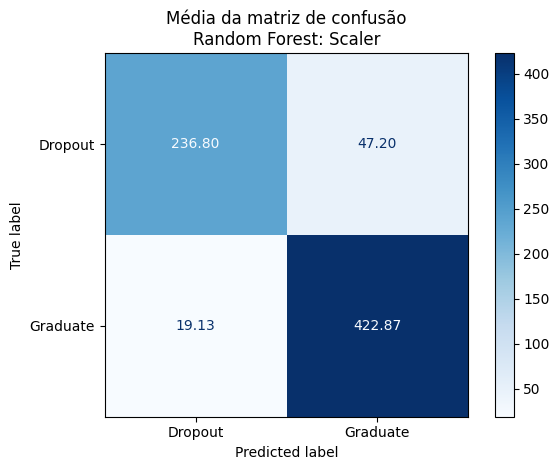

In [71]:
import pandas as pd
import numpy as np
import optuna
import joblib
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

# === 1. Load and prepare data ===
df = pd.read_csv("predict_students_dropout_and_academic_success.csv")
df = df[df["Target"] != "Enrolled"]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === 2. Load best Optuna study ===
study = optuna.load_study(study_name="no-name-7d86f460-e62a-450d-ad4f-d09a17fa12dc", 
                          storage="sqlite:///random_forest_scaler.db")
best_trial = study.best_trial

# === 3. Define scaler options ===
scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none": 'passthrough'
}

# === 4. Rebuild pipeline based on best trial ===
transformers = []
for col in X.columns:
    key = f"scaler_{col}"
    scaler_name = best_trial.params.get(key, "none")
    transformers.append((f"{col}_scaler", scaler_options[scaler_name], [col]))

preprocessor = ColumnTransformer(transformers)

# === 5. Evaluate RandomForest with selected preprocessing 15 times ===
dropout_f1_score_values = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

model = RandomForestClassifier(
        n_estimators=best_trial.params['n_estimators'],
        max_depth=best_trial.params['max_depth'],
        min_samples_split=best_trial.params['min_samples_split'],
        min_samples_leaf=best_trial.params['min_samples_leaf'],
        max_features=best_trial.params['max_features'],
        bootstrap=best_trial.params['bootstrap'],
        n_jobs=-1  # Use all cores for single model training
    )

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    pipeline = Pipeline([
        ("scaler", preprocessor),
        ("classifier", model)
    ])

    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)
    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm
# === 6. Print results ===
randomForestOptunaScaler = np.mean(dropout_f1_score_values)
print("Random Forest (Optuna-selected scalers, without 'Enrolled')")
print("Dropout F1 Score (mean):", randomForestOptunaScaler)
print("Dropout F1 Score (var):", np.var(dropout_f1_score_values))

statistic, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon p-value:", pvalue)

print(classification_report(y_test, preds, target_names=le.classes_))

avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Média da matriz de confusão\nRandom Forest: Scaler")
plt.tight_layout()
plt.savefig(fname="RandomForestOptunaScaler.pdf",format="pdf",dpi=400)

plt.show()


PCA

Iteration 1 - Dropout F1 Score: 0.8681
Iteration 2 - Dropout F1 Score: 0.8614
Iteration 3 - Dropout F1 Score: 0.8748
Iteration 4 - Dropout F1 Score: 0.8672
Iteration 5 - Dropout F1 Score: 0.8497
Iteration 6 - Dropout F1 Score: 0.8608
Iteration 7 - Dropout F1 Score: 0.8816
Iteration 8 - Dropout F1 Score: 0.8694
Iteration 9 - Dropout F1 Score: 0.8229
Iteration 10 - Dropout F1 Score: 0.8593
Iteration 11 - Dropout F1 Score: 0.8642
Iteration 12 - Dropout F1 Score: 0.8355
Iteration 13 - Dropout F1 Score: 0.8809
Iteration 14 - Dropout F1 Score: 0.8743
Iteration 15 - Dropout F1 Score: 0.8346

=== Summary over 15 iterations ===
Mean Dropout F1 Score: 0.860308381458196
Std Dev: 0.0169
Min: 0.8229, Max: 0.8816
Wilcoxon p-value: 6.103515625e-05


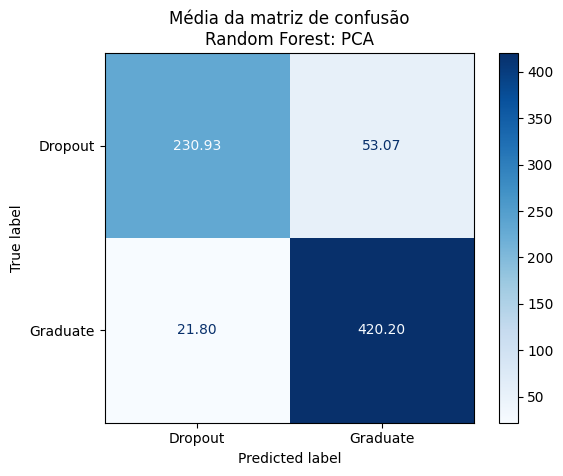

In [72]:
import pandas as pd
import numpy as np
import optuna
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Load the dataset ===
df = pd.read_csv('predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Load the study ===
study = optuna.load_study(
    study_name="no-name-4edeb741-7c80-4857-9a8a-47563ca4f188",
    storage="sqlite:///pca.db"
)

best_params = study.best_trial.params

# === Reconstruct the pipeline using the best params ===
n_components = best_params["pca__n_components"]
svd_solver = best_params["pca__svd_solver"]
whiten = best_params["pca__whiten"]

# Adjust if using arpack
if svd_solver == "arpack":
    n_components = min(n_components, X.shape[1] - 1)

pca = PCA(
    n_components=n_components,
    svd_solver=svd_solver,
    whiten=whiten
)

model = RandomForestClassifier(
        n_estimators=best_trial.params['n_estimators'],
        max_depth=best_trial.params['max_depth'],
        min_samples_split=best_trial.params['min_samples_split'],
        min_samples_leaf=best_trial.params['min_samples_leaf'],
        max_features=best_trial.params['max_features'],
        bootstrap=best_trial.params['bootstrap'],
        n_jobs=-1  # Use all cores for single model training
    )

pipe = Pipeline([
    ("pca", pca),
    ("classifier", model)
])

# === Evaluation over 15 runs ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=index  # ensure reproducibility
    )

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {index+1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary ===
randomForestOptunaPCA = np.mean(dropout_scores)
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {randomForestOptunaPCA}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")
statistic, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon p-value:", pvalue)
# === Plot averaged confusion matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Média da matriz de confusão\nRandom Forest: PCA")
plt.savefig(fname="RandomForestOptunaPCA.pdf",format="pdf",dpi=400)

plt.show()

RFE

Iteration 1 - Dropout F1 Score: 0.8752
Iteration 2 - Dropout F1 Score: 0.8828
Iteration 3 - Dropout F1 Score: 0.8764
Iteration 4 - Dropout F1 Score: 0.8571
Iteration 5 - Dropout F1 Score: 0.8857
Iteration 6 - Dropout F1 Score: 0.8588
Iteration 7 - Dropout F1 Score: 0.8615
Iteration 8 - Dropout F1 Score: 0.8555
Iteration 9 - Dropout F1 Score: 0.8815
Iteration 10 - Dropout F1 Score: 0.8729
Iteration 11 - Dropout F1 Score: 0.8647
Iteration 12 - Dropout F1 Score: 0.8651
Iteration 13 - Dropout F1 Score: 0.8702
Iteration 14 - Dropout F1 Score: 0.8755
Iteration 15 - Dropout F1 Score: 0.8925

=== Summary over 15 iterations ===
Mean Dropout F1 Score: 0.8716892644487793
Std Dev: 0.0108
Min: 0.8555, Max: 0.8925
Wilcoxon p-value: 6.103515625e-05


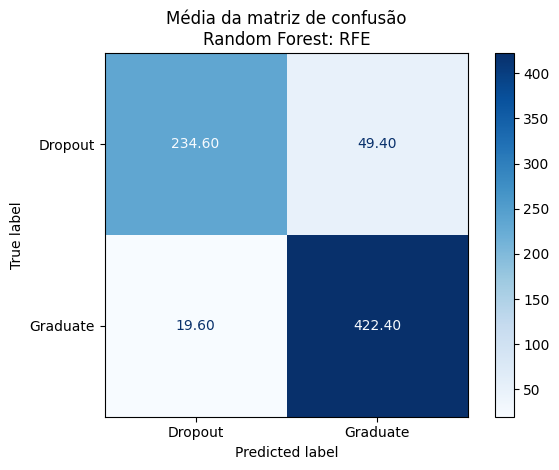

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import optuna

# === Load dataset ===
df = pd.read_csv('predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]  # remove "Enrolled" class

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Load best study from database ===
study_name = "no-name-4edeb741-7c80-4857-9a8a-47563ca4f188"
storage = "sqlite:///rfe.db"

study = optuna.load_study(study_name=study_name, storage=storage)
best_params = study.best_params

# === Rebuild the pipeline using best trial parameters ===
model = RandomForestClassifier(
        n_estimators=best_trial.params['n_estimators'],
        max_depth=best_trial.params['max_depth'],
        min_samples_split=best_trial.params['min_samples_split'],
        min_samples_leaf=best_trial.params['min_samples_leaf'],
        max_features=best_trial.params['max_features'],
        bootstrap=best_trial.params['bootstrap'],
        n_jobs=-1  # Use all cores for single model training
    )

rfe = RFE(
    estimator=model,
    n_features_to_select=best_params["rfe__n_features_to_select"],
    step=best_params["rfe__step"]
)
pipe = Pipeline([
    ("rfe", rfe),
    ("classifier", model)
])

# === Evaluation over 15 iterations ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))  # accumulator

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y
    )

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {index+1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary Statistics ===
randomForestRFE = np.mean(dropout_scores)
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {randomForestRFE}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")
statistic, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon p-value:", pvalue)
# === Averaged Confusion Matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Média da matriz de confusão\nRandom Forest: RFE")
plt.tight_layout()
plt.savefig(fname="RandomForestOptunaRFE.pdf",format="pdf",dpi=400)

plt.show()


Scaler, PCA e RFE 

Iteration 1 - Dropout F1 Score: 0.8561
Iteration 2 - Dropout F1 Score: 0.8881
Iteration 3 - Dropout F1 Score: 0.8577
Iteration 4 - Dropout F1 Score: 0.8782
Iteration 5 - Dropout F1 Score: 0.8571
Iteration 6 - Dropout F1 Score: 0.8731
Iteration 7 - Dropout F1 Score: 0.8731
Iteration 8 - Dropout F1 Score: 0.9019
Iteration 9 - Dropout F1 Score: 0.8500
Iteration 10 - Dropout F1 Score: 0.8454
Iteration 11 - Dropout F1 Score: 0.8844
Iteration 12 - Dropout F1 Score: 0.8748
Iteration 13 - Dropout F1 Score: 0.8314
Iteration 14 - Dropout F1 Score: 0.8771
Iteration 15 - Dropout F1 Score: 0.8733

=== Summary over 15 iterations ===
Mean Dropout F1 Score: 0.8681215538478756
Std Dev: 0.0176
Min: 0.8314, Max: 0.9019
Wilcoxon p-value: 6.103515625e-05


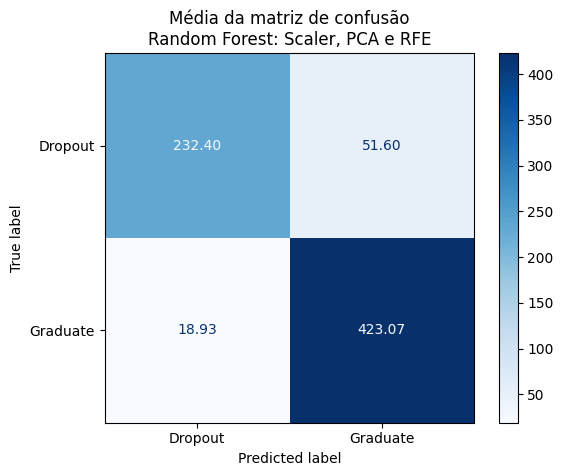

In [74]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Load and preprocess dataset ===
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Retrieve best study trial ===
study = optuna.load_study(
    study_name="optimized_study",
    storage="sqlite:///scaler_pca_rfe.db"
)

best_trial = study.best_trial

# === Reconstruct the pipeline from best trial ===
transformers = []
scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none": 'passthrough'
}

for col in X.columns:
    scaler_choice = best_trial.params.get(f"scaler_{col}", "none")
    transformers.append((f"{col}_scaler", scaler_options[scaler_choice], [col]))

col_transformer = ColumnTransformer(transformers)
steps = [("scaler", col_transformer)]

# === Optionally add PCA ===
if best_trial.params.get("pca_usage") == "pca":
    pca = PCA(
        n_components=best_trial.params["pca__n_components"],
        svd_solver=best_trial.params["pca__svd_solver"],
        whiten=best_trial.params["pca__whiten"]
    )
    steps.append(("pca", pca))

# === Optionally add RFE ===
model = RandomForestClassifier(
        n_estimators=best_trial.params['n_estimators'],
        max_depth=best_trial.params['max_depth'],
        min_samples_split=best_trial.params['min_samples_split'],
        min_samples_leaf=best_trial.params['min_samples_leaf'],
        max_features=best_trial.params['max_features'],
        bootstrap=best_trial.params['bootstrap'],
        n_jobs=-1  # Use all cores for single model training
    )

if best_trial.params.get("rfe_usage") == "rfe":
    rfe = RFE(
        estimator=model,
        n_features_to_select=best_trial.params["rfe__n_features_to_select"],
        step=best_trial.params["rfe__step"]
    )
    steps.append(("rfe", rfe))

# === Final classifier ===
steps.append(("classifier", model))
pipe = Pipeline(steps)

# === Evaluation over 15 iterations ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {index + 1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary Statistics ===
randomForestAll = np.mean(dropout_scores)
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {randomForestAll}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")
statistic, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon p-value:", pvalue)
# === Averaged Confusion Matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Média da matriz de confusão\nRandom Forest: Scaler, PCA e RFE")
plt.savefig(fname="RandomForestOptunaAll.pdf",format="pdf",dpi=400)
plt.show()


XGBoost com scaler, RFE e PCA

Iteration 1 - Dropout F1 Score: 0.8996
Iteration 2 - Dropout F1 Score: 0.9165
Iteration 3 - Dropout F1 Score: 0.8598
Iteration 4 - Dropout F1 Score: 0.8766
Iteration 5 - Dropout F1 Score: 0.8530
Iteration 6 - Dropout F1 Score: 0.8684
Iteration 7 - Dropout F1 Score: 0.8691
Iteration 8 - Dropout F1 Score: 0.8841
Iteration 9 - Dropout F1 Score: 0.8613
Iteration 10 - Dropout F1 Score: 0.8702
Iteration 11 - Dropout F1 Score: 0.8930
Iteration 12 - Dropout F1 Score: 0.8836
Iteration 13 - Dropout F1 Score: 0.8869
Iteration 14 - Dropout F1 Score: 0.8963
Iteration 15 - Dropout F1 Score: 0.8816

=== Summary over 15 iterations ===
Mean Dropout F1 Score: 0.8800038664490212
Std Dev: 0.0165
Min: 0.8530, Max: 0.9165
Wilcoxon p-value: 6.103515625e-05


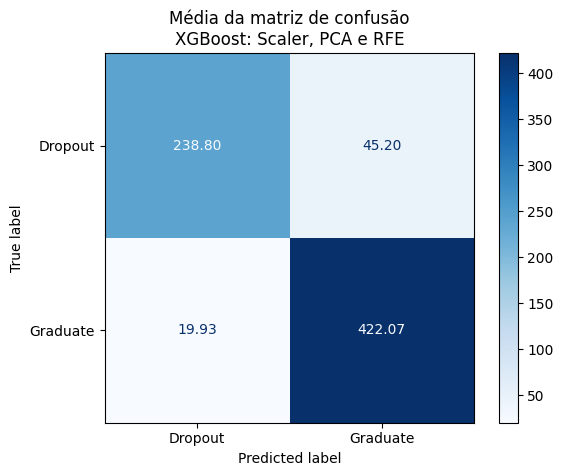

In [75]:
import pandas as pd
import numpy as np
import optuna
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load and preprocess dataset
df = pd.read_csv('predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]

X = df.drop(columns="Target")
y = df["Target"]

le = LabelEncoder()
y = le.fit_transform(y)

# === Load best Optuna study ===
study = optuna.load_study(
    study_name="xgboost_pipeline",
    storage="sqlite:///xgboost_pipeline.db"
)
best_trial = study.best_trial

# === Rebuild pipeline ===
scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none": 'passthrough'
}

# Column Transformer
transformers = []
for col in X.columns:
    scaler_choice = best_trial.params.get(f"scaler_{col}", "none")
    transformers.append((f"{col}_scaler", scaler_options[scaler_choice], [col]))

col_transformer = ColumnTransformer(transformers)
steps = [("scaler", col_transformer)]

# PCA
if best_trial.params.get("pca_usage") == "pca":
    steps.append(("pca", PCA(
        n_components=best_trial.params["pca__n_components"],
        svd_solver=best_trial.params["pca__svd_solver"],
        whiten=best_trial.params["pca__whiten"]
    )))

# Model
model = XGBClassifier(
    n_estimators=best_trial.params["n_estimators"],
    max_depth=best_trial.params["max_depth"],
    learning_rate=best_trial.params["learning_rate"],
    subsample=best_trial.params["subsample"],
    colsample_bytree=best_trial.params["colsample_bytree"],
    gamma=best_trial.params["gamma"],
    reg_alpha=best_trial.params["reg_alpha"],
    reg_lambda=best_trial.params["reg_lambda"],
    use_label_encoder=False,
    eval_metric="mlogloss",
    verbosity=0
)

# RFE
if best_trial.params.get("rfe_usage") == "rfe":
    rfe = RFE(
        estimator=model,
        n_features_to_select=best_trial.params["rfe__n_features_to_select"],
        step=best_trial.params["rfe__step"]
    )
    steps.append(("rfe", rfe))

steps.append(("classifier", model))
pipe = Pipeline(steps)

# === Evaluate best pipeline ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for i in range(15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1s = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_scores.append(f1s[dropout_index])

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {i+1} - Dropout F1 Score: {f1s[dropout_index]:.4f}")

# === Summary statistics ===
xgboostOptunaAll = np.mean(dropout_scores)
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {xgboostOptunaAll}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")
statistic, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon p-value:", pvalue)
# === Average Confusion Matrix ===
avg_cm = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Média da matriz de confusão\nXGBoost: Scaler, PCA e RFE")
plt.savefig(fname="XGBoostOptunaAll.pdf",format="pdf",dpi=400)
plt.show()


Catboost com scaler, PCA e RFE

Iteration 1 - Dropout F1 Score: 0.9064
Iteration 2 - Dropout F1 Score: 0.8831
Iteration 3 - Dropout F1 Score: 0.9007
Iteration 4 - Dropout F1 Score: 0.8630
Iteration 5 - Dropout F1 Score: 0.8835
Iteration 6 - Dropout F1 Score: 0.8897
Iteration 7 - Dropout F1 Score: 0.9055
Iteration 8 - Dropout F1 Score: 0.8514
Iteration 9 - Dropout F1 Score: 0.8827
Iteration 10 - Dropout F1 Score: 0.8872
Iteration 11 - Dropout F1 Score: 0.8939
Iteration 12 - Dropout F1 Score: 0.8646
Iteration 13 - Dropout F1 Score: 0.8769
Iteration 14 - Dropout F1 Score: 0.8723
Iteration 15 - Dropout F1 Score: 0.8741

=== Summary over 15 iterations ===
Mean Dropout F1 Score: 0.8823247493986764
Std Dev: 0.0153
Min: 0.8514, Max: 0.9064
Wilcoxon p-value: 6.103515625e-05


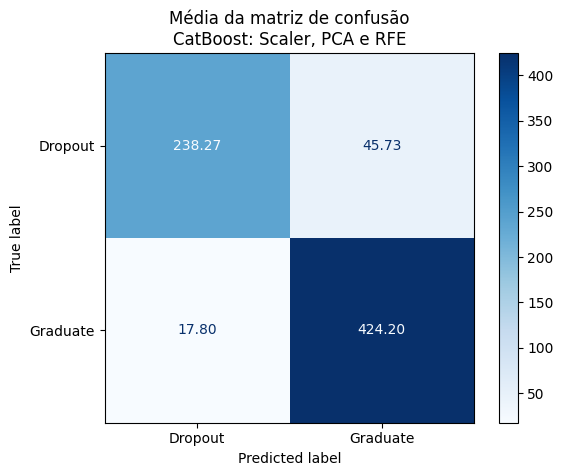

In [76]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# === Load and preprocess dataset ===
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Retrieve best Optuna trial for CatBoost ===
study = optuna.load_study(
    study_name="catboost_pipeline",  # Replace with your actual CatBoost study name
    storage="sqlite:///catboost_pipeline.db"
)

best_trial = study.best_trial

# === Reconstruct the pipeline ===
transformers = []
scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none": 'passthrough'
}

for col in X.columns:
    scaler_choice = best_trial.params.get(f"scaler_{col}", "none")
    transformers.append((f"{col}_scaler", scaler_options[scaler_choice], [col]))

col_transformer = ColumnTransformer(transformers)
steps = [("scaler", col_transformer)]

# === Optional PCA ===
if best_trial.params.get("pca_usage") == "pca":
    steps.append(("pca", PCA(
        n_components=best_trial.params["pca__n_components"],
        svd_solver=best_trial.params["pca__svd_solver"],
        whiten=best_trial.params["pca__whiten"]
    )))

# === CatBoost Classifier with best parameters ===
model = CatBoostClassifier(
    iterations=best_trial.params["iterations"],
    depth=best_trial.params["depth"],
    learning_rate=best_trial.params["learning_rate"],
    l2_leaf_reg=best_trial.params["l2_leaf_reg"],
    # subsample=best_trial.params["subsample"],
    random_strength=best_trial.params["random_strength"],
    verbose=0
)

# === Optional RFE ===
if best_trial.params.get("rfe_usage") == "rfe":
    steps.append(("rfe", RFE(
        estimator=model,
        n_features_to_select=best_trial.params["rfe__n_features_to_select"],
        step=best_trial.params["rfe__step"]
    )))

steps.append(("classifier", model))
pipe = Pipeline(steps)

# === Evaluate the pipeline ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for i in range(15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1_scores = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_scores.append(f1_scores[dropout_index])

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {i+1} - Dropout F1 Score: {f1_scores[dropout_index]:.4f}")

# === Summary Statistics ===
catboostOptunaAll = np.mean(dropout_scores)
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {catboostOptunaAll}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")
statistic, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon p-value:", pvalue)
# === Averaged Confusion Matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Média da matriz de confusão\nCatBoost: Scaler, PCA e RFE")
plt.savefig(fname="CatBoostOptunaAll.pdf",format="pdf",dpi=400)
plt.show()


In [78]:
print("Regressão logística")
print(logisticRegressionMean)
print()
print("Regressão logística sem enrolled")
print(logisticRegressionWithoutEnrolled)
print()
print("Random forest")
print(randomForestMean)
print()
print("Random forest sem enrolled")
print(randomForestWithoutEnrolled)
print()
print("Random forest com Optuna")
print(randomForestOptuna)
print()
print("Random forest com scaler e Optuna")
print(randomForestOptunaScaler)
print()
print("Random forest com PCA e Optuna")
print(randomForestOptunaPCA)
print()
print("Random forest com RFE e Optuna")
print(randomForestRFE)
print()
print("Random forest com todos os pré processamentos com Optuna")
print(randomForestAll)
print()
print("XGBoost com todos os pré processamentos com Optuna")
print(xgboostOptunaAll)
print()
print("CatBoost com todos os pré processamentos com Optuna")
print(catboostOptunaAll)
print()

Regressão logística
0.6973784126568695

Regressão logística sem enrolled
0.8027155653459632

Random forest
0.7987997730054925

Random forest sem enrolled
0.8745861571279059

Random forest com Optuna
0.8759488810569795

Random forest com scaler e Optuna
0.8770027881753172

Random forest com PCA e Optuna
0.860308381458196

Random forest com RFE e Optuna
0.8716892644487793

Random forest com todos os pré processamentos com Optuna
0.8681215538478756

XGBoost com todos os pré processamentos com Optuna
0.8800038664490212

CatBoost com todos os pré processamentos com Optuna
0.8823247493986764



In [89]:
cc = 1201
ads = 591
correto = round(avg_conf_matrix[0][0])
errado = round(avg_conf_matrix[0][1])
total = avg_conf_matrix[0][1]+avg_conf_matrix[0][0]
print(avg_conf_matrix[0][0]/total*100)
print(avg_conf_matrix[0][1]/total*100)
print(total)
print("CC")
print(correto*cc)
print(errado*cc)
print("ADS")
print(correto*ads)
print(errado*ads)

83.89671361502347
16.103286384976524
284.0
CC
285838
55246
ADS
140658
27186
